In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("/Users/nuelcodes/Data-Science-Python/datasets/ecom-expense/Ecom Expense.csv")

In [4]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [5]:
# Creando las variables dummy, tanto para Gender y City Tier
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City")

In [6]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [7]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [8]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [9]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [10]:
df_new =df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [11]:
# Lo siguiente es ver como incluir las variables dummy en el modelo lineal y acceder a sus coeficientes
# Variables predictoras
feature_cols = ["Monthly Income", "Transaction Time",
                "Gender_Female", "Gender_Male",
                "City_Tier 1", "City_Tier 2", "City_Tier 3",
                "Record"]

In [12]:
# Conjunto de datos con los cuales vamos a crear el modelo
X = df_new[feature_cols]
# Lo que quiero predecir
Y = df_new["Total Spend"]

In [13]:
# Creacion del modelo lineal
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Observar los parametros del modelo
print(lm.intercept_) # Corte con el eje de las ordenadas
print(lm.coef_) # Coeficientes

-79.41713030137362
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [15]:
# Unir las variables predictoras con sus coeficientes
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589545),
 ('Gender_Female', -131.02501325554567),
 ('Gender_Male', 131.0250132555456),
 ('City_Tier 1', 76.76432601049527),
 ('City_Tier 2', 55.138974309232474),
 ('City_Tier 3', -131.9033003197278),
 ('Record', 772.2334457445648)]

In [16]:
# Si queremos ver que tan bueno es el modelo
lm.score(X, Y)

0.9179923586131016

El modelo puede ser escrito como: 
    Total_Spend = -79.41713030137362 + Monthly Income * 0.14753898049205738 +
                Transaction Time * 0.15494612549589545 + Gender_Female * (-131.02501325554567) +
                Gender_Male * 131.0250132555456 + City_Tier 1 * 76.76432601049527 +
                City_Tier 2 * 55.138974309232474 + City_Tier 3 * (-131.9033003197278) + 
                Record * 772.2334457445648

In [17]:
# Calcular la Desviacion Tipica de los Residuos
df_new["Prediction"] = -79.41713030137362 + df_new['Monthly Income'] * 0.14753898049205738 + df_new['Transaction Time'] * 0.15494612549589545 + df_new['Gender_Female'] * (-131.02501325554567) + df_new['Gender_Male'] * 131.0250132555456 + df_new['City_Tier 1'] * 76.76432601049527 + df_new['City_Tier 2'] * 55.138974309232474 + df_new['City_Tier 3'] * (-131.9033003197278) + df_new['Record'] * 772.2334457445648

In [18]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,Prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [19]:
# Calcula la raiz de la suma de los cuadrados de los errores entre el numero de registros menos las variables predictoras menos 1
SSD = np.sum((df_new['Prediction'] - df_new["Total Spend"])**2)
SSD

1517733985.3408163

In [20]:
RSE = np.sqrt(SSD / (len(df_new) - len(feature_cols) - 1))
RSE

803.1318809818165

In [21]:
# Promedio de ventas
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [22]:
error = RSE / sales_mean
error

0.13031135680294162

## Eliminar variable dummy

El modelo orginal: 
    Total_Spend = -79.41713030137362 + Monthly Income * 0.14753898049205738 +
                Transaction Time * 0.15494612549589545 + Gender_Female * (-131.02501325554567) +
                Gender_Male * 131.0250132555456 + City_Tier 1 * 76.76432601049527 +
                City_Tier 2 * 55.138974309232474 + City_Tier 3 * (-131.9033003197278) + 
                Record * 772.2334457445648

## Transformación de variables para conseguir una relación no lineal

In [23]:
import pandas as pd

In [24]:
data_auto = pd.read_csv("/Users/nuelcodes/Data-Science-Python/datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [25]:
# Numero de filas y columnas
data_auto.shape

(406, 9)

In [26]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

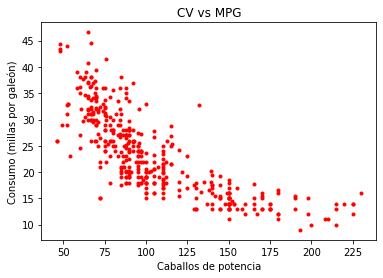

In [27]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna() # Eliminando los N/A de la columna mpg
data_auto["horsepower"] = data_auto["horsepower"].dropna() # Eliminando los N/A de la columna horsepower
plt.plot(data_auto["horsepower"], data_auto["mpg"], "r.")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

### Modelo de regresión lineal
* mpg = a + b * horsepower

In [28]:
# Rellenamos los N/A con el promedio de cada columna
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:, np.newaxis]

In [29]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

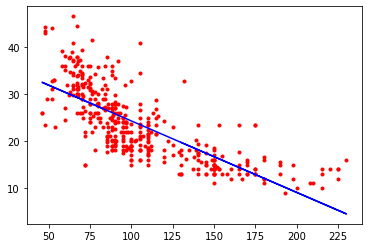

In [30]:
%matplotlib inline
plt.plot(X, Y, "r.")
plt.plot(X, lm.predict(X_data), color="blue")

In [31]:
lm.score(X_data, Y)

0.574653340645025

In [32]:
# Suma de los cuadrados de las desviaciones
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD / (len(X_data) - 1))
y_mean = np.mean(Y)
error = RSE / y_mean
SSD, RSE, y_mean, error*100

(10315.75196006092, 5.046879480825511, 23.51457286432162, 21.46277336163346)

### Modelo de regresión cuadrático
* mpg = a + b * horsepower^2

In [33]:
X_data = X**2
X_data = X_data[:, np.newaxis]

In [34]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
lm.score(X_data, Y)

0.4849887034823205

In [36]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD / (len(X_data) - 1))
y_mean = np.mean(Y)
error = RSE / y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

### Modelo de regresión lineal y cuadrático
* mpg = a + b * horsepower + c * horsepower^2

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [38]:
poly = PolynomialFeatures(degree=2)

In [40]:
X_data = poly.fit_transform(X[:, np.newaxis])

In [42]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# Verificando si l modelo mejoro o no
lm.score(X_data, Y)

0.6439066584257469

In [54]:
# Ver si aunmentando el grado (con un bucle), nuestro modelo mejora
for d in range (2,12):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:, np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado " + str(d))
    print("R2: " + str(lm.score(X_data, Y)))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, Y, lm.predict(X_data))

Regresión de grado 2
R2: 0.6439066584257469
55.026192447080355
[ 0.         -0.43404318  0.00112615]
8636.180643524502 4.61778115803654 23.51457286432162 19.63795466190689
Regresión de grado 3
R2: 0.6444678885560744
58.448774111918084
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
8622.56936742855 4.614140736300908 23.51457286432162 19.622473106036676
Regresión de grado 4
R2: 0.6467674189704502
40.096643848138505
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
8566.799832491353 4.5991947315797574 23.51457286432162 19.55891250126878
Regresión de grado 5
R2: 0.6547512489366876
-40.693812896755176
[ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621369e-04
 -2.36220932e-06  3.41982935e-09]
8373.171393636556 4.546921735442387 23.51457286432162 19.336612073193884
Regresión de grado 6
R2: 0.6572844624926477
-157.07318244319492
[ 0.00000000e+00  1.07623366e+01 -2.30128498e-01  2.40537386e-03
 -1.33773692e-05  3.79725608e-08 -4.3248745

In [51]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD / (len(X_data) - 1))
    y_mean = np.mean(Y)
    error = RSE / y_mean
    print(SSD, RSE, y_mean, error*100)